<a href="https://colab.research.google.com/github/GayathriPgithub/Python-/blob/main/House_priceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("train-chennai-sale.csv")
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


DATA CLEANING


In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
x=df["QS_OVERALL"].mean()

In [ ]:
df["QS_OVERALL"].fillna(value=x,inplace=True)

In [ ]:
df.loc[df.duplicated()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [ ]:
df["DATE_SALE"]=pd.to_datetime(df["DATE_SALE"],format='%d-%m-%Y')

In [ ]:
df["DATE_BUILD"]=pd.to_datetime(df["DATE_BUILD"],format='%d-%m-%Y')

In [ ]:
df["HOUSE_AGE"]=pd.DatetimeIndex(df["DATE_SALE"]).year-pd.DatetimeIndex(df["DATE_BUILD"]).year

In [ ]:
df["TOTAL_PRICE"]=pd.DataFrame(df["SALES_PRICE"]+df["COMMIS"]+df["REG_FEE"])

In [ ]:
df["AREA"]=df["AREA"].replace({"Karapakam":"Karapakkam",
                               "Adyr":"Adyar",
                               "Chrmpet":"Chrompet",
                               "Chormpet":"Chrompet",
                               "Chrompt":"Chrompet",
                               "Velchery":"Velachery",
                               "KKNagar":"KK Nagar",
                               "Ann Nagar":"Anna Nagar",
                               "Ana Nagar":"Anna Nagar",
                               "TNagar":"T Nagar"
                               })

In [ ]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [ ]:
df.SALE_COND=df["SALE_COND"].replace({"AdjLand":"Adj Land",
                                     "Partiall":"Partial",
                                      "PartiaLl":"Partial",
                                      "AbNormal":"Ab Normal"})

In [ ]:
df.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
Ab Normal      1411
Family         1403
Name: SALE_COND, dtype: int64

In [ ]:
df["PARK_FACIL"]=df["PARK_FACIL"].replace({"Noo":"No"})

In [ ]:
df["PARK_FACIL"].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [ ]:
df["BUILDTYPE"]=df["BUILDTYPE"].replace({"Comercial":"Commercial",
                                         "Other":"Others"})

In [ ]:
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace({"AllPub":"All Pub"
                                              
                                                 })

In [ ]:
df["UTILITY_AVAIL"].value_counts()

All Pub    1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
df["STREET"]=df["STREET"].replace({"Pavd":"Paved",
                                   "NoAccess":"No Access"})

In [ ]:
df["N_BEDROOM"]=df["N_BEDROOM"].astype(int,errors="ignore")

In [ ]:
df["N_BATHROOM"]=df["N_BATHROOM"].astype(int,errors="ignore")

In [ ]:
a=df["N_BEDROOM"].mean()

FILLING NULL VALUES 

In [ ]:
df["N_BEDROOM"].fillna(value=a,inplace=True)

In [ ]:
b=df["N_BATHROOM"].mean()

In [ ]:
df["N_BATHROOM"].fillna(value=b,inplace=True)

EXPLORATORY DATA ANALYSIS

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Total Price spread')

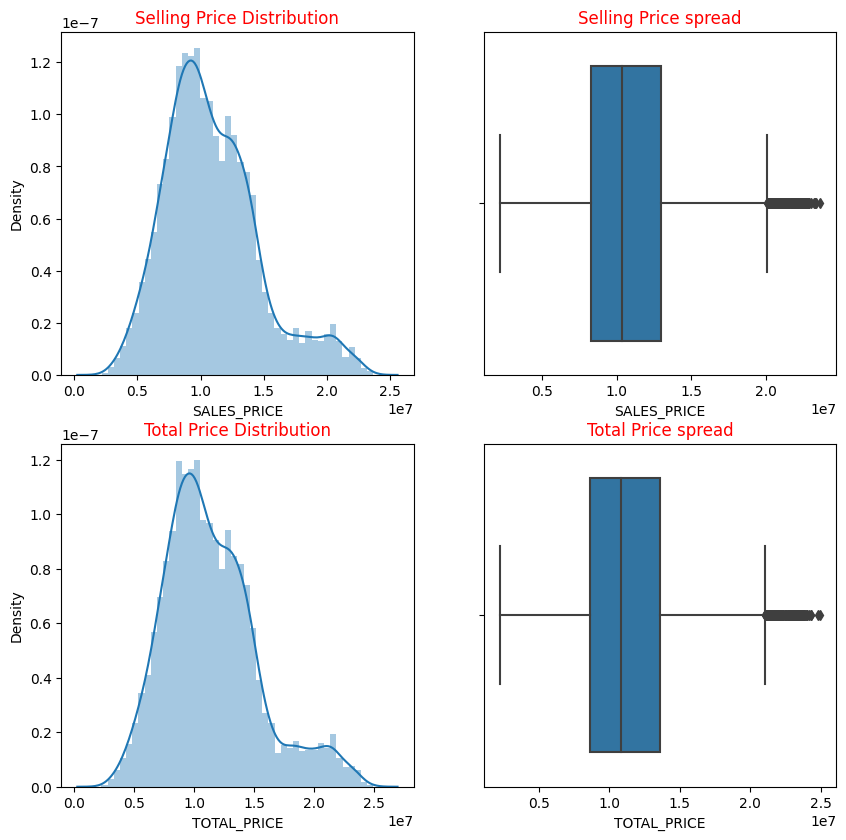

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.distplot(df["SALES_PRICE"],kde=True)
plt.title("Selling Price Distribution",color="red")

plt.subplot(2,2,2)
sns.boxplot(df["SALES_PRICE"])
plt.title("Selling Price spread",color="red")

plt.subplot(2,2,3)
sns.distplot(df["TOTAL_PRICE"],kde=True)
plt.title("Total Price Distribution",color="red")

plt.subplot(2,2,4)
sns.boxplot(df["TOTAL_PRICE"])
plt.title("Total Price spread",color="red")

In [ ]:
df["SALES_PRICE"].describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

INFERENCE:

1. The plot depicted no skewness
 

PLOTTING NUMERICAL VALUES

In [ ]:
df.select_dtypes(include=np.number)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE,TOTAL_PRICE
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000,44,8124400
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,21717770,11,22781941
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,13159200,20,13672408
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,9630290,22,10063653
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,74063,7406250,30,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.2,2.4,2.520,208767,107060,5353000,49,5668827
7105,1897,52,3.0,2.0,5,3.6,4.5,3.3,3.920,346191,205551,10818480,9,11370222
7106,1614,152,2.0,1.0,4,4.3,4.2,2.9,3.840,317354,167028,8351410,28,8835792
7107,787,40,1.0,1.0,2,4.6,3.8,4.1,4.160,425350,119098,8507000,32,9051448


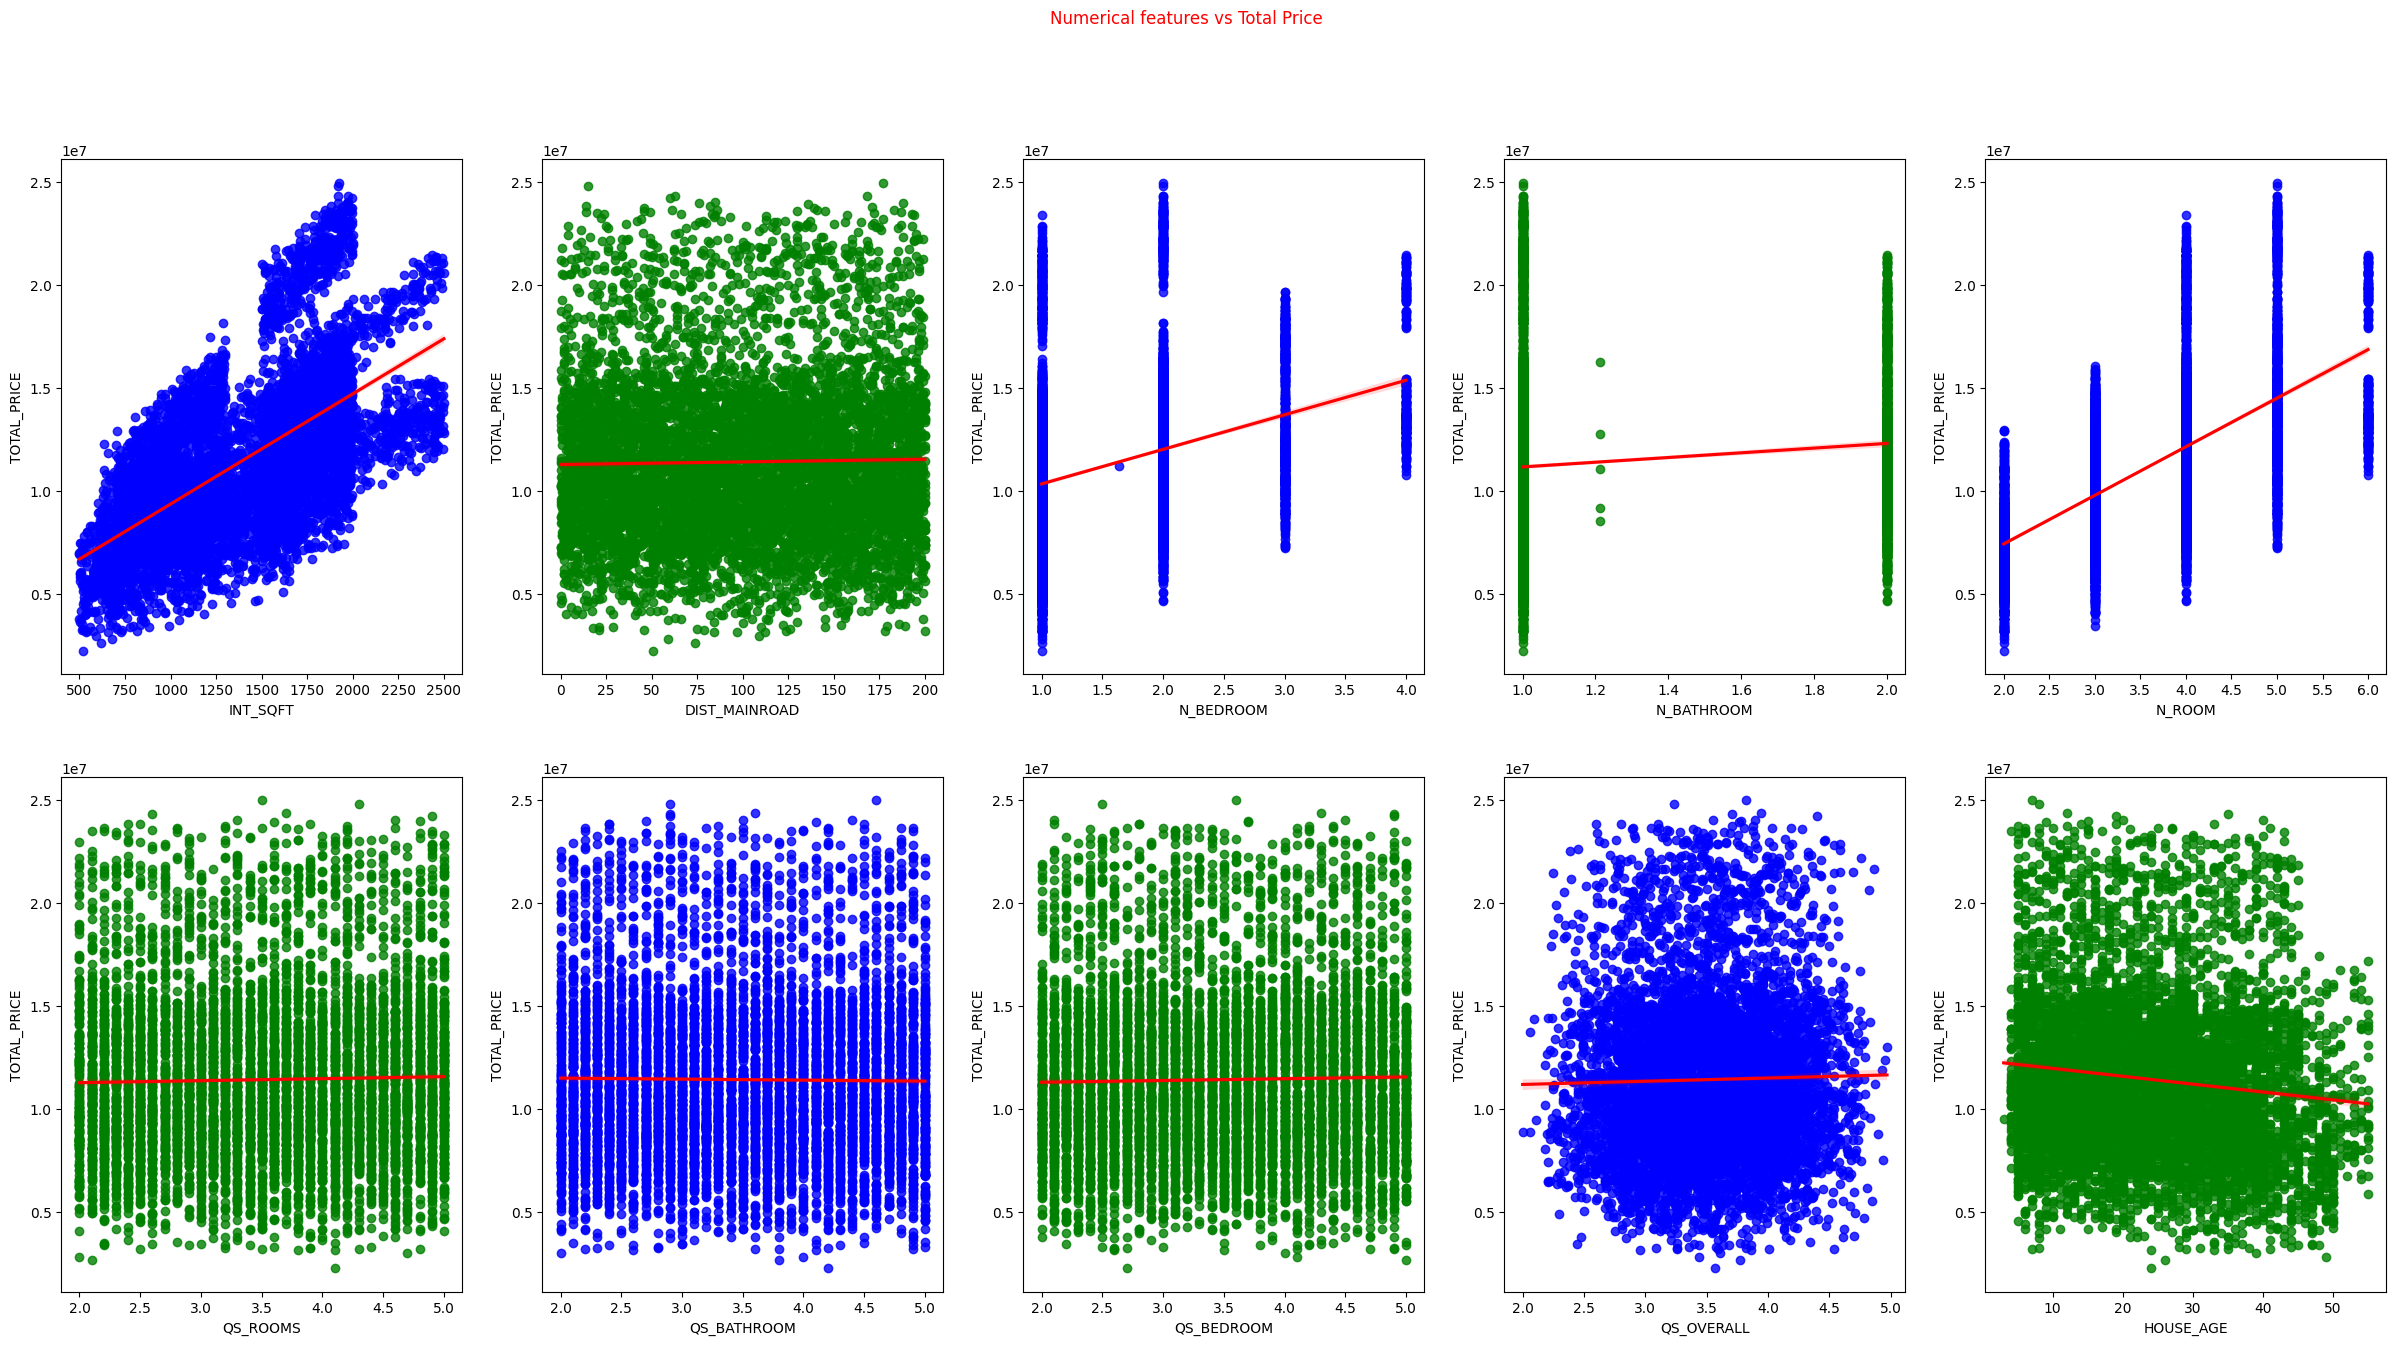

In [ ]:
plt.figure(figsize=(30,15),dpi=100)
plt.subplot(2,5,1)
sns.regplot(df["INT_SQFT"],df["TOTAL_PRICE"],scatter_kws={'color':'blue'},line_kws={'color':"red"})

plt.subplot(2,5,2)
sns.regplot(df["DIST_MAINROAD"],df["TOTAL_PRICE"],scatter_kws={'color':'green'},line_kws={'color':"red"})

plt.subplot(2,5,3)
sns.regplot(df["N_BEDROOM"],df["TOTAL_PRICE"],scatter_kws={'color':'blue'},line_kws={'color':"red"})

plt.subplot(2,5,4)
sns.regplot(df["N_BATHROOM"],df["TOTAL_PRICE"],scatter_kws={'color':'green'},line_kws={'color':"red"})

plt.subplot(2,5,5)
sns.regplot(df["N_ROOM"],df["TOTAL_PRICE"],scatter_kws={'color':'blue'},line_kws={'color':"red"})

plt.subplot(2,5,6)
sns.regplot(df["QS_ROOMS"],df["TOTAL_PRICE"],scatter_kws={'color':'green'},line_kws={'color':"red"})

plt.subplot(2,5,7)
sns.regplot(df["QS_BATHROOM"],df["TOTAL_PRICE"],scatter_kws={'color':'blue'},line_kws={'color':"red"})

plt.subplot(2,5,8)
sns.regplot(df["QS_BEDROOM"],df["TOTAL_PRICE"],scatter_kws={'color':'green'},line_kws={'color':"red"})

plt.subplot(2,5,9)
sns.regplot(df["QS_OVERALL"],df["TOTAL_PRICE"],scatter_kws={'color':'blue'},line_kws={'color':"red"})

plt.subplot(2,5,10)
sns.regplot(df["HOUSE_AGE"],df["TOTAL_PRICE"],scatter_kws={'color':'green'},line_kws={'color':"red"})

plt.suptitle("Numerical features vs Total Price",color="red")
plt.show()


INFERENCE:

1. The feature INT_SQFT,N_BEDROOM and N_ROOM shows good relation with the output.

2. However, the feature N_BATHROOM and HOUSE_AGE shows small relation with the output.

3. While, the other numerical features DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM and QS_OVERALL shows no relation with the output.


PLOTTING CATEGORICAL VALUES

In [ ]:
df.select_dtypes(include=np.object)

,PRT_ID,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,Ab Normal,Yes,Commercial,All Pub,Paved,A
1,P09411,Anna Nagar,Ab Normal,No,Commercial,All Pub,Gravel,RH
2,P01812,Adyar,Ab Normal,Yes,Commercial,ELO,Gravel,RL
3,P05346,Velachery,Family,No,Others,NoSewr,Paved,I
4,P06210,Karapakkam,Ab Normal,Yes,Others,All Pub,Gravel,C
...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,Adj Land,No,Others,ELO,No Access,RM
7105,P10000,Velachery,Family,Yes,Others,NoSeWa,No Access,RH
7106,P09594,Velachery,Normal Sale,No,House,NoSeWa,Gravel,I
7107,P06508,Karapakkam,Partial,Yes,Commercial,ELO,Paved,RL


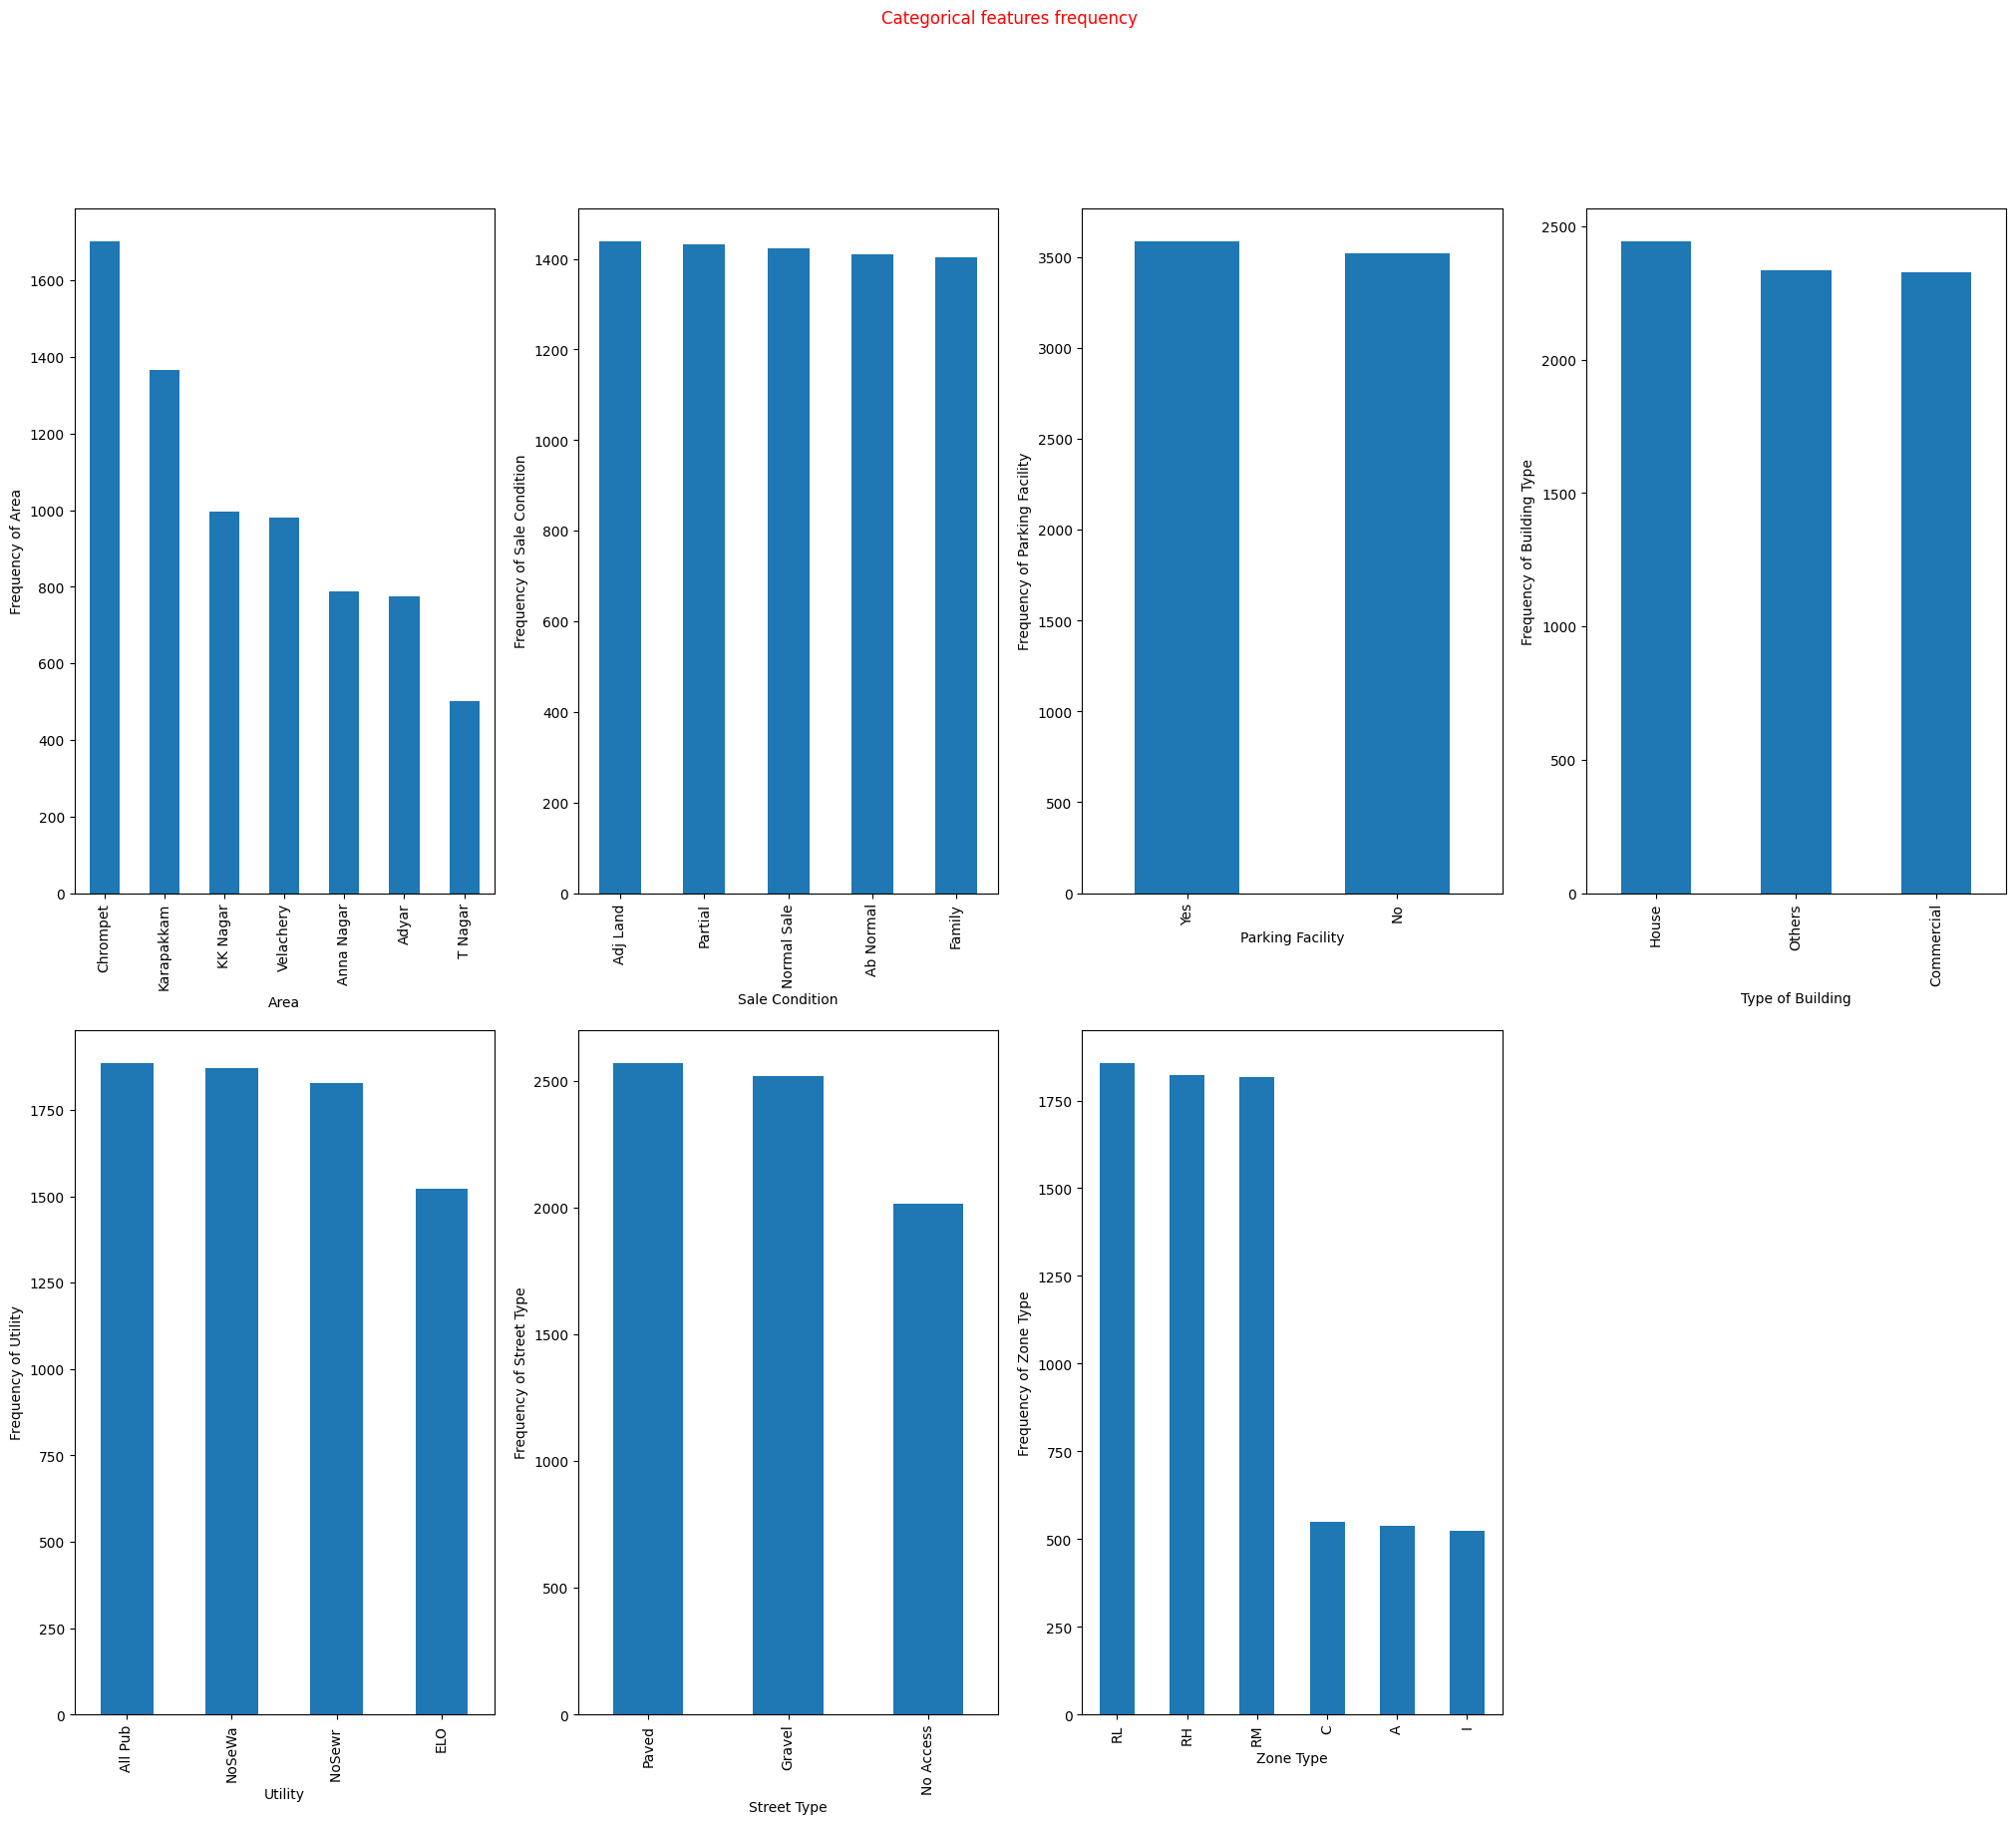

In [ ]:
plt.figure(figsize=(25,20),dpi=100)
plt.subplot(2,4,1)
a=df["AREA"].value_counts().plot(kind='bar')
a.set(xlabel='Area',ylabel='Frequency of Area')

plt.subplot(2,4,2)
a=df["SALE_COND"].value_counts().plot(kind='bar')
a.set(xlabel='Sale Condition',ylabel='Frequency of Sale Condition')

plt.subplot(2,4,3)
a=df["PARK_FACIL"].value_counts().plot(kind='bar')
a.set(xlabel='Parking Facility',ylabel='Frequency of Parking Facility')

plt.subplot(2,4,4)
a=df["BUILDTYPE"].value_counts().plot(kind='bar')
a.set(xlabel='Type of Building',ylabel='Frequency of Building Type')

plt.subplot(2,4,5)
a=df["UTILITY_AVAIL"].value_counts().plot(kind='bar')
a.set(xlabel='Utility',ylabel='Frequency of Utility')

plt.subplot(2,4,6)
a=df["STREET"].value_counts().plot(kind='bar')
a.set(xlabel='Street Type',ylabel='Frequency of Street Type')

plt.subplot(2,4,7)
a=df["MZZONE"].value_counts().plot(kind='bar')
a.set(xlabel='Zone Type',ylabel='Frequency of Zone Type')

plt.suptitle("Categorical features frequency",color='red')
plt.show()

INFERENCE

1. Chrompet seemed to be favorite area 
2. Most prefferable building type is house
3. Paved street is more than gravel and others.
4. Number of low residential is high when compared to others.


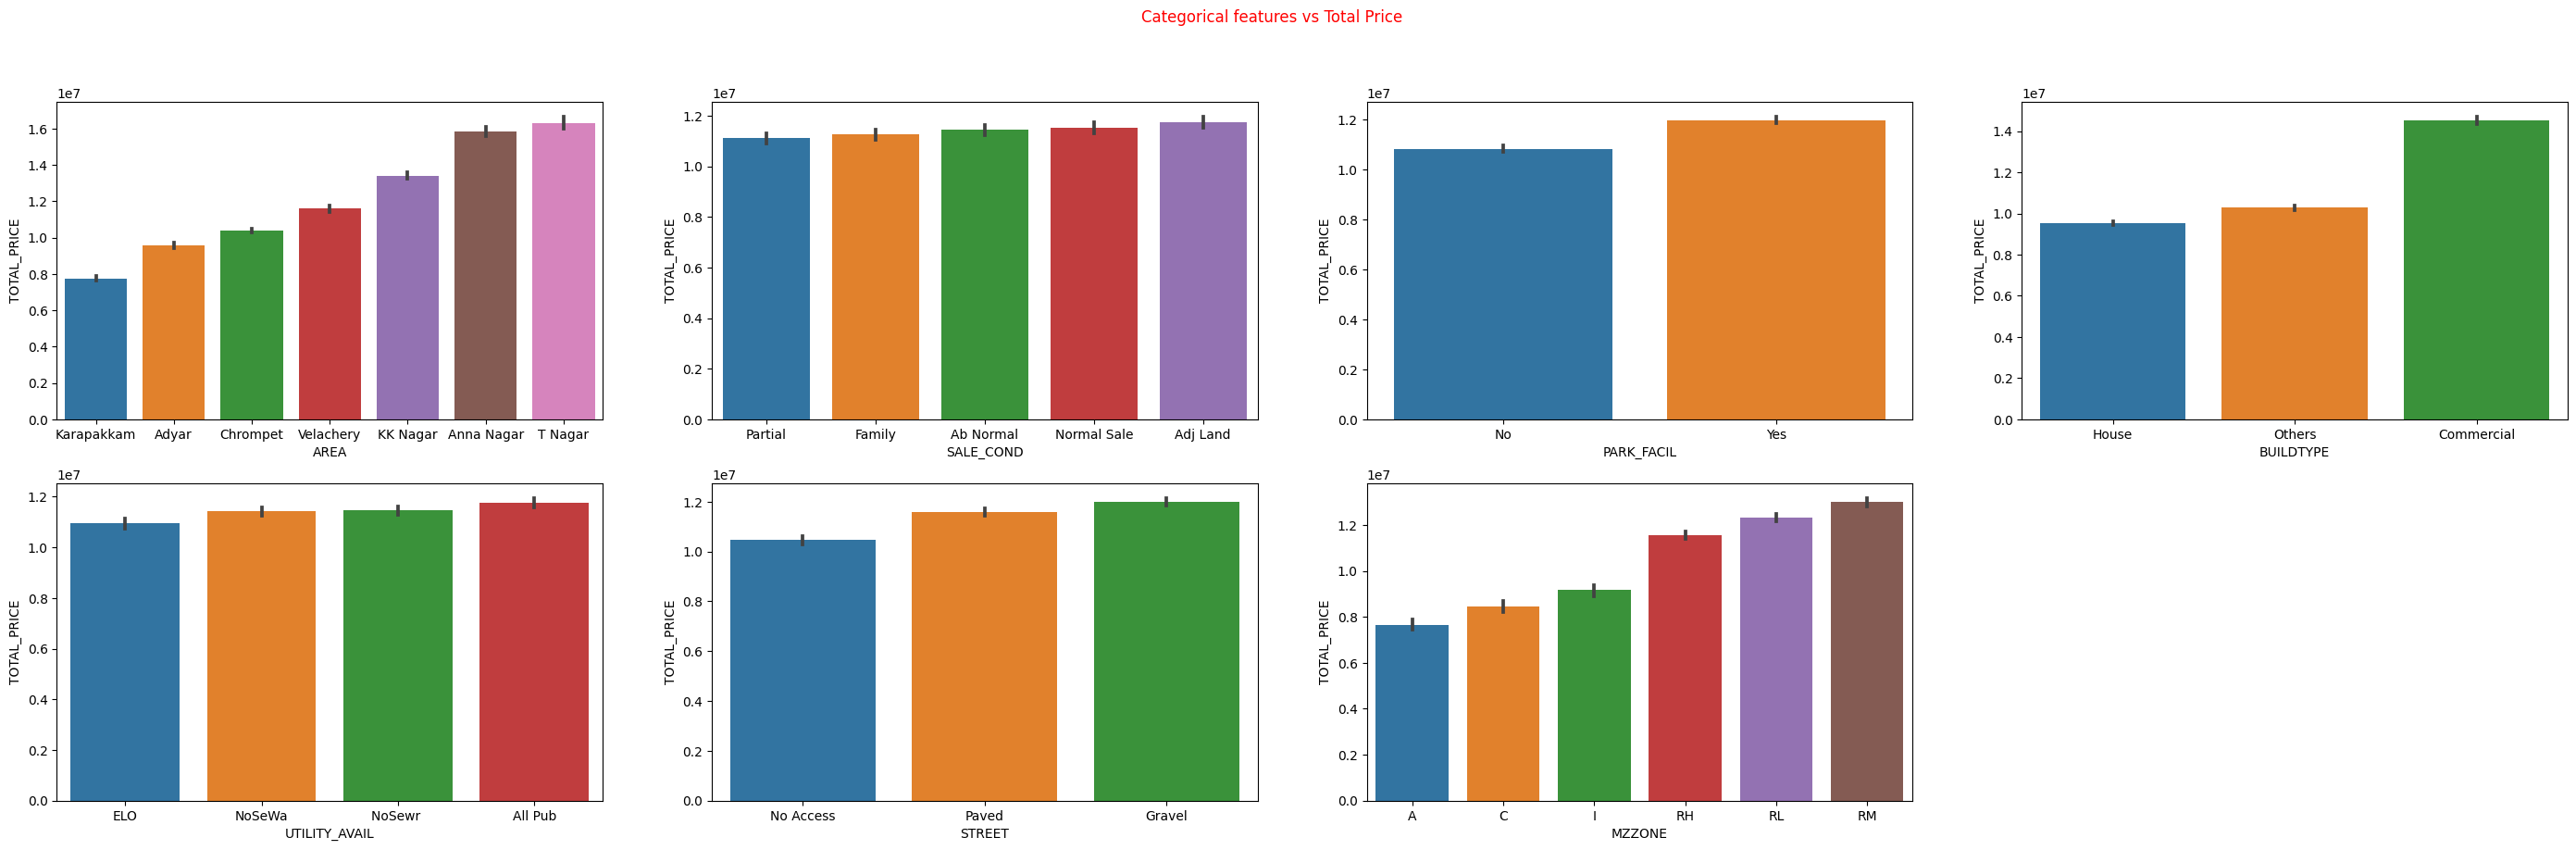

In [ ]:
plt.figure(figsize=(35,10),dpi=100)
plt.subplot(2,4,1)
sns.barplot(x=df["AREA"],y=df["TOTAL_PRICE"],order=df.groupby("AREA")["TOTAL_PRICE"].mean().reset_index().sort_values("TOTAL_PRICE")["AREA"])

plt.subplot(2,4,2)
sns.barplot(x=df["SALE_COND"],y=df["TOTAL_PRICE"],order=df.groupby("SALE_COND")["TOTAL_PRICE"].mean().reset_index().sort_values("TOTAL_PRICE")["SALE_COND"])

plt.subplot(2,4,3)
sns.barplot(x=df["PARK_FACIL"],y=df["TOTAL_PRICE"],order=df.groupby("PARK_FACIL")["TOTAL_PRICE"].mean().reset_index().sort_values("TOTAL_PRICE")["PARK_FACIL"])

plt.subplot(2,4,4)
sns.barplot(x=df["BUILDTYPE"],y=df["TOTAL_PRICE"],order=df.groupby("BUILDTYPE")["TOTAL_PRICE"].mean().reset_index().sort_values("TOTAL_PRICE")["BUILDTYPE"])

plt.subplot(2,4,5)
sns.barplot(x=df["UTILITY_AVAIL"],y=df["TOTAL_PRICE"],order=df.groupby("UTILITY_AVAIL")["TOTAL_PRICE"].mean().reset_index().sort_values("TOTAL_PRICE")["UTILITY_AVAIL"])

plt.subplot(2,4,6)
sns.barplot(x=df["STREET"],y=df["TOTAL_PRICE"],order=df.groupby("STREET")["TOTAL_PRICE"].mean().reset_index().sort_values("TOTAL_PRICE")["STREET"])

plt.subplot(2,4,7)
sns.barplot(x=df["MZZONE"],y=df["TOTAL_PRICE"],order=df.groupby("MZZONE")["TOTAL_PRICE"].mean().reset_index().sort_values("TOTAL_PRICE")["MZZONE"])

plt.suptitle("Categorical features vs Total Price",color="red")
plt.show()

INFERENCE :

1. From this we infer that all categorical features, excpet building type, have good linear relation with total price. Hence, LabelEncoding can be done.

2. For the feature Building type, OneHotEncoding is done.


In [ ]:
df.drop(["PRT_ID","DATE_SALE","DATE_BUILD","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","REG_FEE","COMMIS"],axis=1,inplace=True)

ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["AREA"]=le.fit_transform(df["AREA"])
df["SALE_COND"]=le.fit_transform(df["SALE_COND"])
df["PARK_FACIL"]=le.fit_transform(df["PARK_FACIL"])
df["UTILITY_AVAIL"]=le.fit_transform(df["UTILITY_AVAIL"])
df["STREET"]=le.fit_transform(df["STREET"])
df["MZZONE"]=le.fit_transform(df["MZZONE"])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df=pd.get_dummies(df,columns=["BUILDTYPE"])

MINMAX SCALER

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

columns=["AREA","INT_SQFT","DIST_MAINROAD","N_BEDROOM","N_BATHROOM",
         "N_ROOM","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET",
         "MZZONE","HOUSE_AGE","BUILDTYPE_Commercial","BUILDTYPE_House",
         "BUILDTYPE_Others","SALES_PRICE","TOTAL_PRICE"]
df[columns]=scaler.fit_transform(df[columns])         

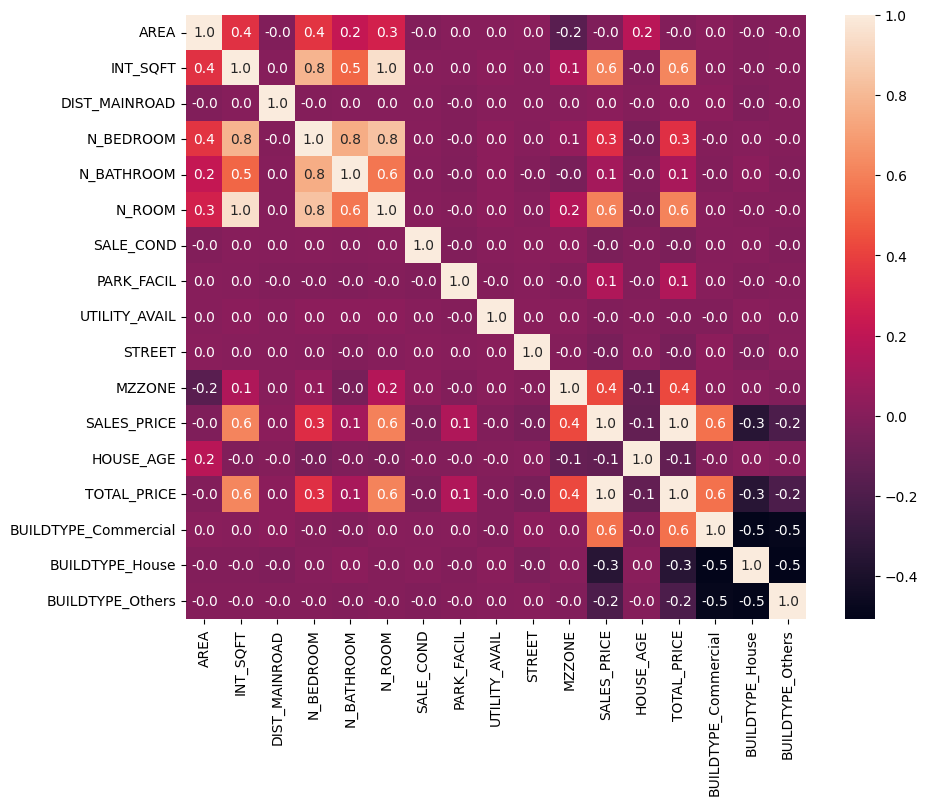

In [ ]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.corr(),fmt='.1f',annot=True)

INFERENCE:

INT_SQFT,N_ROOM,MZZONE,N_BEDROOM and commercial BUILDTYPE influence more in determining sales price.

In [ ]:
X=df[["AREA","INT_SQFT","DIST_MAINROAD","N_BEDROOM","N_BATHROOM","N_ROOM","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","HOUSE_AGE","BUILDTYPE_Commercial","BUILDTYPE_House","BUILDTYPE_Others"]]
y=df["SALES_PRICE"]
y1=df["TOTAL_PRICE"]

TRAIN TEST 

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=(0.3))

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

FOR SALES PRICE

In [ ]:
model.fit(X_train,y_train)


LinearRegression()

In [ ]:
y_predicted=model.predict(X_test)

In [ ]:
y_predicted

array([0.31152344, 0.53857422, 0.28125   , ..., 0.50390625, 0.39013672,
       0.31103516])

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
print("MAE:",(metrics.mean_absolute_error(y_predicted,y_test)))
print("MSE:",(metrics.mean_squared_error(y_predicted,y_test)))
print("R2_SCORE:",(metrics.r2_score(y_predicted,y_test)))

MAE: 0.04128877215092076
MSE: 0.002830777078256549
R2_SCORE: 0.895515442831024


FOR TOTAL PRICE

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y1,test_size=(0.3))

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y1_predicted=model.predict(X_test)

In [ ]:
print("MAE:",(metrics.mean_absolute_error(y1_predicted,y_test)))
print("MSE:",(metrics.mean_squared_error(y1_predicted,y_test)))
print("R2_SCORE:",(metrics.r2_score(y1_predicted,y_test)))

MAE: 0.0405840318606376
MSE: 0.0027736827335511664
R2_SCORE: 0.8958443368154234
